In [1]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset with selected features (X1)
data = pd.read_csv("Engineered/train_linear_ready.csv")

# Split features and target
X = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

# Split into train/test for final evaluation later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 1],
    "reg_lambda": [1, 1.5, 2]
}

# Initialize model
xgb = XGBRegressor(random_state=42)

# Set up RandomizedSearchCV
search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run hyperparameter tuning
search.fit(X_train, y_train)

# Output the best results
print("Best parameters found:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)

# Retrain final model on full training set
best_model = search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best CV RMSE: 30417.0671875
Test RMSE: 28125.768967265587


In [3]:
import os

# Create the 'Models' directory if it doesn't exist
os.makedirs("Models", exist_ok=True)

# Now save the model
import joblib
joblib.dump(best_model, "Models/tuned_xgb_model.pkl")
print("Tuned XGBoost model saved to Models/tuned_xgb_model.pkl")


Tuned XGBoost model saved to Models/tuned_xgb_model.pkl


<Figure size 1000x600 with 0 Axes>

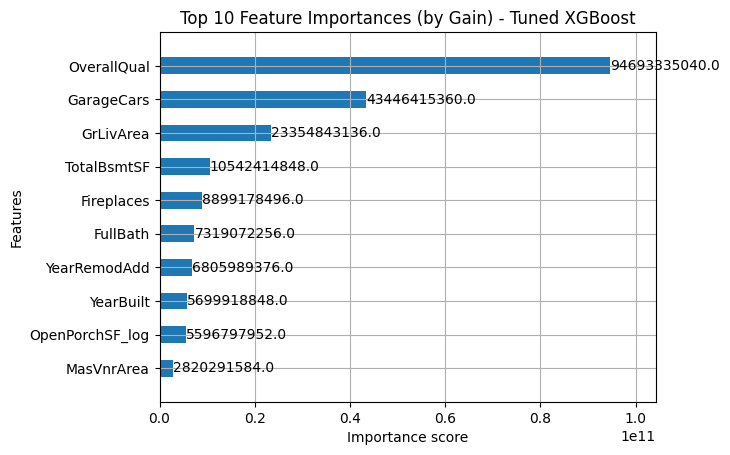

In [4]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance directly using XGBoost's built-in function
plt.figure(figsize=(10, 6))
plot_importance(best_model, importance_type='gain', max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances (by Gain) - Tuned XGBoost")
plt.show()
